In [34]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import seaborn as sns
import ipywidgets as widgets
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Import data

In [10]:
# Params
news_counts_directory = '../../../SDF-HF/data/proc/news_counts'

## Trading 

In [11]:
trading_results_df = pd.read_parquet('../../Results/trading_results/results.parquet')
trading_returns_df = pd.read_parquet('../../Results/trading_results/returns.parquet')
trading_weights_df = pd.read_parquet('../../Results/trading_results/weights.parquet')

## News

In [47]:
news_counts_df = pd.read_parquet(f'{news_counts_directory}')
news_counts_df.columns = [x.replace('&', 'and') for x in news_counts_df.columns]
news_key_terms = list(news_counts_df.columns)[:-1]


# Analysis

In [112]:
# Params
dependent_df = trading_weights_df.copy()
alpha_param = 0.5

In [113]:
model = sm.OLS.from_formula("Market ~ " + " + ".join(news_key_terms),
    dependent_df["Benchmark"].join(news_counts_df))
fit = model.fit_regularized(method = 'elastic_net', alpha = alpha_param, L1_wt =1)
print(fit.params.loc[fit.params != 0])

airlines                   0.009566
retail                     0.016856
utilities                  0.007461
iraq                       0.006695
russia                     0.011026
china                      0.006649
mining                     0.012630
agriculture                0.002348
oil_market                 0.009504
federal_reserve            0.010568
european_sovereign_debt    0.008037
options_vix                0.003912
sec                        0.012980
convertible_preferred     -0.005740
nasd                       0.015076
dtype: float64


In [114]:
model = sm.OLS.from_formula("Tanh ~ " + " + ".join(news_key_terms),
    dependent_df["Lasso"].join(news_counts_df))
fit = model.fit_regularized(method = 'elastic_net', alpha = alpha_param, L1_wt =1)
print(fit.params.loc[fit.params != 0])

russia                     0.002680
china                      0.001662
agriculture                0.003261
federal_reserve            0.003983
european_sovereign_debt    0.003574
sec                        0.003428
dtype: float64


In [115]:
model = sm.OLS.from_formula("Tanh ~ " + " + ".join(news_key_terms),
    dependent_df["LR_PCA_select"].join(news_counts_df))
fit = model.fit_regularized(method = 'elastic_net', alpha = alpha_param, L1_wt =1)
print(fit.params.loc[fit.params != 0])

russia                     0.002962
china                      0.002122
agriculture                0.002868
economic_growth            0.000138
federal_reserve            0.004361
european_sovereign_debt    0.004834
sec                        0.003552
dtype: float64


In [116]:
model = sm.OLS.from_formula("Tanh ~ " + " + ".join(news_key_terms),
    dependent_df["NN"].join(news_counts_df))
fit = model.fit_regularized(method = 'elastic_net', alpha = alpha_param, L1_wt =1)
print(fit.params.loc[fit.params != 0])

russia                   0.004442
china                    0.005965
germany                  0.001350
agriculture              0.006710
oil_market               0.005475
federal_reserve          0.005771
sec                      0.008493
convertible_preferred   -0.003179
nasd                     0.016474
dtype: float64


In [117]:
model = sm.OLS.from_formula("Sign ~ " + " + ".join(news_key_terms),
    dependent_df["Lasso"].join(news_counts_df))
fit = model.fit_regularized(method = 'elastic_net', alpha =alpha_param, L1_wt =1)
print(fit.params.loc[fit.params != 0])

china                    0.007898
agriculture              0.006693
sec                      0.009052
convertible_preferred   -0.004715
nasd                     0.008340
credit_ratings           0.006664
dtype: float64


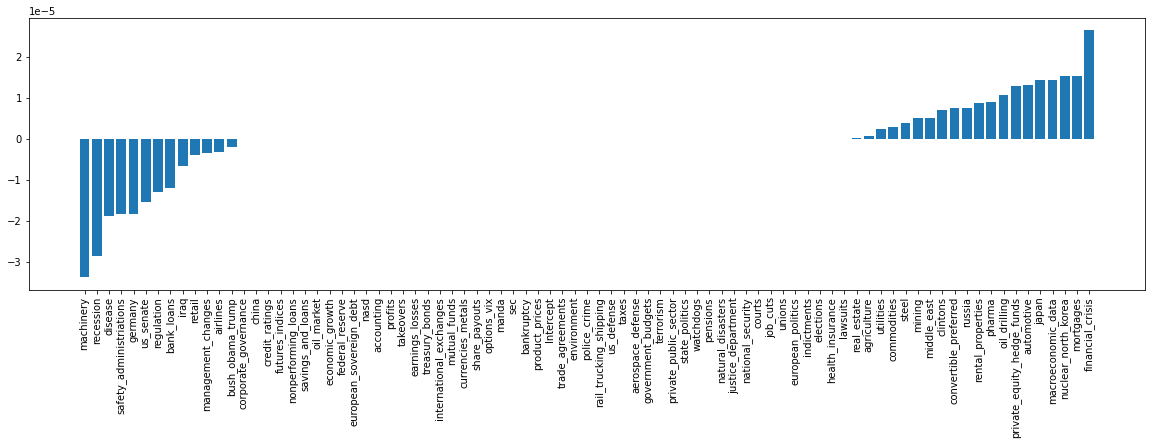

In [81]:
results = fit.params.sort_values()
plt.subplots(figsize = (20,5))
plt.bar(x = results.index, height = results)
plt.xticks(rotation=90);

In [48]:
smf.ols.fit(
    
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Market   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.132
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           7.07e-20
Time:                        19:43:47   Log-Likelihood:             7.2678e+05
No. Observations:              155245   AIC:                        -1.453e+06
Df Residuals:                  155162   BIC:                        -1.453e+06
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   6.674e-05   1.49e-05      4.468      0.000    3.75e-05     9.6e-05
job_cuts                    6.915e-06    2.9e-06      2.385      0.017    1.23e-06    1.26e-05
unions                     -2.368e-06   5.12e-06     -0.463      0.644   -1.24e-05    7.66e-06
health_insurance             8.28e-07   2.16e-06      0.384      0.701    -3.4e-06    5.06e-06
pensions                    2.196e-06   1.64e-06      1.338      0.181   -1.02e-06    5.41e-06
government_budgets          4.502e-07   2.02e-06      0.223      0.824   -3.51e-06    4.41e-06
taxes                      -4.433e-07   1.56e-06     -0.285      0.776   -3.49e-06    2.61e-06
management_changes         -2.696e-06   2.65e-06     -1.016      0.309    -7.9e-06     2.5e-06
natural_disasters          -1.499e-06   1.41e-06     -1.059      0.290   -4.27e-06    1.27e-06
police_crime                3.538e-06   3.31e-06      1.068      0.285   -2.95e-06       1e-05
rail_trucking_shipping      2.514e-06    1.7e-06      1.479      0.139   -8.17e-07    5.84e-06
rental_properties           5.407e-06    1.8e-06      3.004      0.003    1.88e-06    8.93e-06
disease                      4.83e-07   1.58e-06      0.306      0.760   -2.61e-06    3.58e-06
us_defense                 -1.849e-06   5.51e-06     -0.336      0.737   -1.26e-05    8.95e-06
pharma                     -1.774e-06   1.64e-06     -1.082      0.279   -4.99e-06    1.44e-06
aerospace_defense          -5.076e-06   2.15e-06     -2.364      0.018   -9.28e-06   -8.67e-07
automotive                  6.982e-07   1.35e-06      0.519      0.604   -1.94e-06    3.34e-06
airlines                   -4.034e-06   1.68e-06     -2.404      0.016   -7.32e-06   -7.46e-07
retail                     -3.292e-06   1.61e-06     -2.040      0.041   -6.46e-06   -1.29e-07
regulation                  3.251e-06   1.63e-06      1.989      0.047    4.77e-08    6.45e-06
environment                 2.662e-06   1.38e-06      1.934      0.053   -3.58e-08    5.36e-06
private_public_sector       1.004e-06   2.65e-06      0.379      0.705   -4.19e-06    6.19e-06
state_politics              4.931e-07   2.16e-06      0.228      0.820   -3.75e-06    4.74e-06
watchdogs                   5.759e-07   3.38e-06      0.171      0.865   -6.04e-06     7.2e-06
utilities                  -3.191e-06   1.55e-06     -2.062      0.039   -6.22e-06   -1.58e-07
safety_administriations    -7.812e-06   2.31e-06     -3.376      0.001   -1.23e-05   -3.28e-06
national_security          -4.394e-06   2.27e-06     -1.939      0.053   -8.84e-06    4.81e-08
justice_department         -3.613e-06    2.8e-06     -1.292      0.197    -9.1e-06    1.87e-06
indictments                -2.358e-06   3.38e-06     -0.698      0.485   -8.98e-06    4.27e-06
courts                     -3.947e-07   1.7